<a href="https://colab.research.google.com/github/wabinyai/AIRQO-web/blob/master/KABALE_%26_MWENDO_shapefiles_processing_IN_SERT_TO_MONGEDB_FOR_KABALE_MUNICIPALITY_AirQloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
!pip install fiona
!pip install geopandas
!pip install pymongo
#!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
import fiona
import geopandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient, GEOSPHERE
import shapely
from shapely import geometry, wkt
from shapely.geometry import Polygon, Point, MultiPolygon
from datetime import datetime
import glob

##**Data connection**

In [65]:
client=MongoClient('localhost',27017)

client = MongoClient('mongodb ')#connection string url
db = client['stage_airqo'] #dbname
#collection = db.airqlouds #collectionname
location_collection = db.locations ## collection name

Admininstrative levels

https://gadm.org/download_country.html#google_vignette

In [67]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving stanford-hb557fg0018-shapefile.zip to stanford-hb557fg0018-shapefile (1).zip
User uploaded file "stanford-hb557fg0018-shapefile.zip" with length 18442994 bytes


In [68]:
#filepath0 = 'NGA_adm/NGA_adm0.shp'
data0_ = geopandas.read_file(fn)

data0_.head()

,dname_2002,d_02_id,cname_2002,c_02_id,sname_2002,s_02_id,pname_2002,p_02_id,ftype,label_p,...,p_06_id,area,perimeter,hectares,dname_2010,sname_2010,subregion,pname_2010,country,geometry
0,KALANGALA,101,KYAMUSWA,1012,BUBEKE,101201,JAANA,10120102.0,Populated Area,Jaana,...,10120100.0,3693259.121,13322.878,369.326,KALANGALA,BUBEKE,CENTRAL 1,JAANA,UGANDA,"POLYGON ((32.58384 -0.21551, 32.58429 -0.21564..."
1,KAMPALA,102,KAMPALA CITY COUNCIL,1021,CENTRAL DIVISION,102101,KOLOLO I,10210110.0,Populated Area,Kololo I,...,10210100.0,1156934.016,6488.074,115.693,KAMPALA,CENTRAL DIVISION,CENTRAL 1,KOLOLO I,UGANDA,"POLYGON ((32.59492 0.34412, 32.59499 0.34416, ..."
2,KAMPALA,102,KAMPALA CITY COUNCIL,1021,CENTRAL DIVISION,102101,KOLOLO II,10210111.0,Populated Area,Kololo II,...,10210100.0,1068686.625,4347.292,106.869,KAMPALA,CENTRAL DIVISION,CENTRAL 1,KOLOLO II,UGANDA,"POLYGON ((32.58950 0.34222, 32.58908 0.34118, ..."
3,KAMPALA,102,KAMPALA CITY COUNCIL,1021,CENTRAL DIVISION,102101,KOLOLO III,10210112.0,Populated Area,Kololo III,...,10210100.0,928639.703,4388.508,92.864,KAMPALA,CENTRAL DIVISION,CENTRAL 1,KOLOLO III,UGANDA,"POLYGON ((32.58581 0.34034, 32.58576 0.34030, ..."
4,KAMPALA,102,KAMPALA CITY COUNCIL,1021,CENTRAL DIVISION,102101,OLD KAMPALA,10210120.0,Populated Area,Old Kampala,...,10210100.0,579810.344,3661.548,57.981,KAMPALA,CENTRAL DIVISION,CENTRAL 1,OLD KAMPALA,UGANDA,"POLYGON ((32.57083 0.32424, 32.57084 0.32402, ..."


In [69]:
data0_.dname_2002.unique()

array(['KALANGALA', 'KAMPALA', 'GULU', 'LIRA', 'KABAROLE', 'LUWERO',
       'MPIGI', 'NAKASONGOLA', 'WAKISO', 'MBARARA', 'NTUNGAMO', 'RAKAI',
       'KUMI', 'MUBENDE', 'MUKONO', 'JINJA', 'BUGIRI', 'PALLISA', 'MBALE',
       'KATAKWI', 'BUSIA', 'SIRONKO', 'ARUA', 'MOYO', 'IGANGA',
       'KAPCHORWA', 'KASESE', 'SOROTI', 'TORORO', 'KIBOGA', 'MAYUGE',
       'APAC', 'KOTIDO', 'ADJUMANI', 'KISORO', 'MASINDI', 'KITGUM',
       'MOROTO', 'NEBBI', 'KIBAALE', 'KAMWENGE', 'KANUNGU', 'BUSHENYI',
       'PADER', 'YUMBE', 'KAYUNGA', 'NAKAPIRIPIRIT', 'BUNDIBUGYO',
       'HOIMA', 'KABALE', 'RUKUNGIRI', 'MASAKA', 'KYENJOJO', 'KAMULI',
       'SSEMBABULE', 'KABERAMAIDO'], dtype=object)

<Axes: >

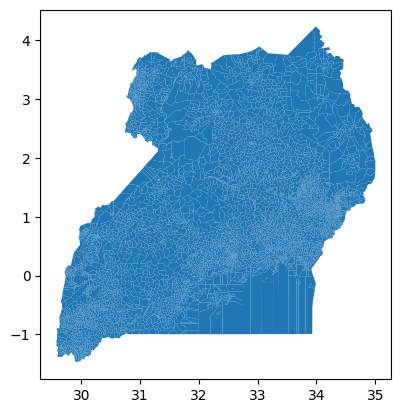

In [70]:
data0_.plot()

#**Convert multipolygone to polygon**

In [71]:
data0 = data0_.explode(ignore_index=True)


data0['area'] = data0['geometry'].apply(lambda x:x.area)
#data0
xx= data0.sort_values(by='area', ascending=False)
xx.head()

,dname_2002,d_02_id,cname_2002,c_02_id,sname_2002,s_02_id,pname_2002,p_02_id,ftype,label_p,...,p_06_id,area,perimeter,hectares,dname_2010,sname_2010,subregion,pname_2010,country,geometry
5613,MUKONO,108,BUVUMA,1082,BUGAYA,108201,BUWAGA,10820101.0,Water,Buwaga,...,10820100.0,0.202690,335613.372,249282.608,MUKONO,BUGAYA,CENTRAL 2,BUWAGA,UGANDA,"POLYGON ((33.26123 -0.99659, 33.07122 -0.99664..."
5620,MUKONO,108,BUVUMA,1082,BWEEMA,108203,LWAJJE,10820302.0,Water,Lwajje,...,10820300.0,0.197133,267686.008,242445.191,MUKONO,BWEEMA,CENTRAL 2,LWAJJE,UGANDA,"POLYGON ((33.07122 -0.99664, 32.87702 -0.99668..."
5638,MUKONO,108,BUVUMA,1082,NAIRAMBI,108204,LUFU,10820402.0,Water,Lufu,...,10820400.0,0.190265,354651.384,234009.719,MUKONO,NAIRAMBI,CENTRAL 2,LUFU,UGANDA,"POLYGON ((33.36186 -0.24990, 33.36188 -0.24875..."
5486,KALANGALA,101,KYAMUSWA,1012,KYAMUSWA,101203,BUZINGO,10120302.0,Water,Buzingo,...,10120300.0,0.188575,229277.846,231929.031,KALANGALA,KYAMUSWA,CENTRAL 1,BUZINGO,UGANDA,"POLYGON ((32.40193 -0.74976, 32.40187 -0.74502..."
6196,MAYUGE,214,BUNYA,2141,MALONGO,214106,SAGITU,21410608.0,Water,Sagitu,...,21410600.0,0.139641,283725.317,171757.312,MAYUGE,MALONGO,EAST CENTRAL,SAGITU,UGANDA,"POLYGON ((33.52066 -0.22626, 33.52142 0.00021,..."


In [81]:
dataw = xx[xx['dname_2002'] =='KABALE']
dataw.head()

,dname_2002,d_02_id,cname_2002,c_02_id,sname_2002,s_02_id,pname_2002,p_02_id,ftype,label_p,...,p_06_id,area,perimeter,hectares,dname_2010,sname_2010,subregion,pname_2010,country,geometry
2251,KABALE,404,RUBANDA,4043,IKUMBA,404304,BWINDI NP,40430408.0,National Park,Bwindi NP,...,40430400.0,0.004633,43894.448,5715.593,KABALE,IKUMBA,SOUTH WESTERN,BWINDI NP,UGANDA,"POLYGON ((29.79905 -1.05797, 29.79932 -1.05815..."
4971,KABALE,404,RUKIGA,4044,KAMWEZI,404402,KIBANDA,40440202.0,Populated Area,Kibanda,...,40440200.0,0.003720,30138.038,4584.754,KABALE,KAMWEZI,SOUTH WESTERN,KIBANDA,UGANDA,"POLYGON ((30.29822 -1.15308, 30.29816 -1.15337..."
6560,KABALE,404,RUBANDA,4043,BUBARE,404301,BWINDI,40430103.0,Populated Area,Bwindi,...,40430100.0,0.002810,30668.861,3464.930,KABALE,BUBARE,SOUTH WESTERN,BWINDI,UGANDA,"POLYGON ((30.00070 -1.14512, 30.00202 -1.14599..."
6605,KABALE,404,RUBANDA,4043,IKUMBA,404304,NYAKABUNGO,40430405.0,Populated Area,Nyakabungo,...,40430400.0,0.002455,34495.910,3027.682,KABALE,IKUMBA,SOUTH WESTERN,NYAKABUNGO,UGANDA,"POLYGON ((29.84124 -1.11742, 29.84143 -1.11792..."
6615,KABALE,404,RUBANDA,4043,MUKO,404305,KAARA,40430503.0,Populated Area,Kaara,...,40430500.0,0.002187,26947.620,2697.551,KABALE,MUKO,SOUTH WESTERN,KAARA,UGANDA,"POLYGON ((29.75157 -1.12206, 29.75177 -1.12210..."


In [73]:
dataw.cname_2002.unique()

array(['RUBANDA', 'RUKIGA', 'NDORWA', 'KABALE MUNICIPALITY'], dtype=object)

In [107]:
dataw1=dataw[dataw['cname_2002'] =='KABALE MUNICIPALITY']
dataw1.head()

,dname_2002,d_02_id,cname_2002,c_02_id,sname_2002,s_02_id,pname_2002,p_02_id,ftype,label_p,...,p_06_id,area,perimeter,hectares,dname_2010,sname_2010,subregion,pname_2010,country,geometry
6496,KABALE,404,KABALE MUNICIPALITY,4041,KABALE SOUTHERN,404103,MWANJARI WARD,40410303.0,Populated Area,Mwanjari Ward,...,40410300.0,0.000412,11128.045,508.098,KABALE,KABALE SOUTHERN,SOUTH WESTERN,MWANJARI WARD,UGANDA,"POLYGON ((29.99827 -1.25989, 29.99790 -1.26025..."
6497,KABALE,404,KABALE MUNICIPALITY,4041,KABALE SOUTHERN,404103,KARUBANDA WARD,40410301.0,Populated Area,Karubanda Ward,...,40410300.0,0.000377,9725.885,465.367,KABALE,KABALE SOUTHERN,SOUTH WESTERN,KARUBANDA WARD,UGANDA,"POLYGON ((29.99566 -1.27562, 29.99567 -1.27664..."
6498,KABALE,404,KABALE MUNICIPALITY,4041,KABALE SOUTHERN,404103,RUSHAKI WARD,40410304.0,Populated Area,Rushaki Ward,...,40410300.0,0.000346,8760.338,426.805,KABALE,KABALE SOUTHERN,SOUTH WESTERN,RUSHAKI WARD,UGANDA,"POLYGON ((30.01591 -1.25349, 30.01580 -1.25422..."
6490,KABALE,404,KABALE MUNICIPALITY,4041,KABALE CENTRAL,404101,BUTOBERE WARD,40410101.0,Populated Area,Butobere Ward,...,40410100.0,0.000336,10130.623,414.481,KABALE,KABALE CENTRAL,SOUTH WESTERN,BUTOBERE WARD,UGANDA,"POLYGON ((30.00456 -1.22616, 30.00480 -1.22658..."
4250,KABALE,404,KABALE MUNICIPALITY,4041,KABALE NORTHERN,404102,KIJUGUTA WARD,40410201.0,Populated Area,Kijuguta Ward,...,40410200.0,0.000245,8329.449,301.835,KABALE,KABALE NORTHERN,SOUTH WESTERN,KIJUGUTA WARD,UGANDA,"POLYGON ((29.96679 -1.22914, 29.96756 -1.22808..."


In [121]:
gdf1 = dataw

cname_mask = gdf1.filter(like='cname_2002', axis=1).eq('KABALE MUNICIPALITY').any(axis=1)
pname_mask = gdf1.filter(like='pname_2002', axis=1).eq('MWENDO').any(axis=1)

gdf_filtered1 = gdf1[cname_mask | pname_mask]
gdf_filtered1 

,dname_2002,d_02_id,cname_2002,c_02_id,sname_2002,s_02_id,pname_2002,p_02_id,ftype,label_p,...,p_06_id,area,perimeter,hectares,dname_2010,sname_2010,subregion,pname_2010,country,geometry
6515,KABALE,404,NDORWA,4042,KITUMBA,404204,MWENDO,40420405.0,Populated Area,Mwendo,...,40420400.0,1.038761e-03,22087.501,1292.189,KABALE,KITUMBA,SOUTH WESTERN,MWENDO,UGANDA,"POLYGON ((29.93037 -1.27671, 29.93014 -1.27581..."
6496,KABALE,404,KABALE MUNICIPALITY,4041,KABALE SOUTHERN,404103,MWANJARI WARD,40410303.0,Populated Area,Mwanjari Ward,...,40410300.0,4.120606e-04,11128.045,508.098,KABALE,KABALE SOUTHERN,SOUTH WESTERN,MWANJARI WARD,UGANDA,"POLYGON ((29.99827 -1.25989, 29.99790 -1.26025..."
6497,KABALE,404,KABALE MUNICIPALITY,4041,KABALE SOUTHERN,404103,KARUBANDA WARD,40410301.0,Populated Area,Karubanda Ward,...,40410300.0,3.774145e-04,9725.885,465.367,KABALE,KABALE SOUTHERN,SOUTH WESTERN,KARUBANDA WARD,UGANDA,"POLYGON ((29.99566 -1.27562, 29.99567 -1.27664..."
6498,KABALE,404,KABALE MUNICIPALITY,4041,KABALE SOUTHERN,404103,RUSHAKI WARD,40410304.0,Populated Area,Rushaki Ward,...,40410300.0,3.461464e-04,8760.338,426.805,KABALE,KABALE SOUTHERN,SOUTH WESTERN,RUSHAKI WARD,UGANDA,"POLYGON ((30.01591 -1.25349, 30.01580 -1.25422..."
6490,KABALE,404,KABALE MUNICIPALITY,4041,KABALE CENTRAL,404101,BUTOBERE WARD,40410101.0,Populated Area,Butobere Ward,...,40410100.0,3.361508e-04,10130.623,414.481,KABALE,KABALE CENTRAL,SOUTH WESTERN,BUTOBERE WARD,UGANDA,"POLYGON ((30.00456 -1.22616, 30.00480 -1.22658..."
4250,KABALE,404,KABALE MUNICIPALITY,4041,KABALE NORTHERN,404102,KIJUGUTA WARD,40410201.0,Populated Area,Kijuguta Ward,...,40410200.0,2.447781e-04,8329.449,301.835,KABALE,KABALE NORTHERN,SOUTH WESTERN,KIJUGUTA WARD,UGANDA,"POLYGON ((29.96679 -1.22914, 29.96756 -1.22808..."
6494,KABALE,404,KABALE MUNICIPALITY,4041,KABALE NORTHERN,404102,UPPER BUGONGI WARD,40410204.0,Populated Area,Upper Bugongi Ward,...,40410200.0,2.310954e-04,7420.031,284.953,KABALE,KABALE NORTHERN,SOUTH WESTERN,UPPER BUGONGI WARD,UGANDA,"POLYGON ((30.00456 -1.22616, 30.00462 -1.22866..."
6492,KABALE,404,KABALE MUNICIPALITY,4041,KABALE NORTHERN,404102,RUTOOMA WARD,40410203.0,Populated Area,Rutooma Ward,...,40410200.0,1.798002e-04,7265.554,221.716,KABALE,KABALE NORTHERN,SOUTH WESTERN,RUTOOMA WARD,UGANDA,"POLYGON ((29.97790 -1.24379, 29.97861 -1.24410..."
6495,KABALE,404,KABALE MUNICIPALITY,4041,KABALE SOUTHERN,404103,KIRIGIME WARD,40410302.0,Populated Area,Kirigime Ward,...,40410300.0,1.504149e-04,7334.872,185.472,KABALE,KABALE SOUTHERN,SOUTH WESTERN,KIRIGIME WARD,UGANDA,"POLYGON ((29.98152 -1.25181, 29.98155 -1.25195..."
6487,KABALE,404,KABALE MUNICIPALITY,4041,KABALE CENTRAL,404101,NYABIKONI WARD,40410104.0,Populated Area,Nyabikoni Ward,...,40410100.0,1.326733e-04,6331.770,163.598,KABALE,KABALE CENTRAL,SOUTH WESTERN,NYABIKONI WARD,UGANDA,"POLYGON ((29.98346 -1.25049, 29.98345 -1.25052..."


<Axes: >

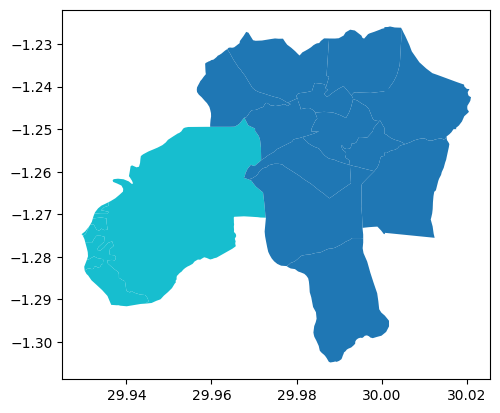

In [122]:
gdf_filtered1.plot(column='cname_2002')

In [116]:
dataw.pname_2002

2251      BWINDI NP
4971        KIBANDA
6560         BWINDI
6605     NYAKABUNGO
6615          KAARA
           ...     
6530        KITOOMA
6572        MUGYERA
6576    NYAMIRYANGO
6559       KAGARAMA
6541       RWANYENA
Name: pname_2002, Length: 183, dtype: object

# Mapping with FOLIUM 
This is for easy presentation 

In [123]:
import folium
from folium import plugins
import geopandas as gpd

# Convert dataw1 to a GeoDataFrame
gdf = gpd.GeoDataFrame(gdf_filtered1)

# Compute the centroid of the geometries
centroid = gdf.geometry.centroid
latitude = centroid.y
longitude = centroid.x

# Create the map centered on the centroid
m = folium.Map(location=[latitude.mean(), longitude.mean()], zoom_start=13)

# Add the data as a GeoJSON layer to the map
folium.GeoJson(
    gdf,
    name='Data',
    style_function=lambda x: {
        'fillColor': 'green' if x['properties']['cname_2002'] == 'KABALE MUNICIPALITY' else 'blue',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7,
    },
    tooltip=folium.features.GeoJsonTooltip(fields=['pname_2002'], aliases=['Region:'])
).add_to(m)

# Add a LayerControl to the map
folium.LayerControl().add_to(m)

# Display the map
m


<ipython-input-123-12260e3e2209>:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.geometry.centroid


<Axes: >

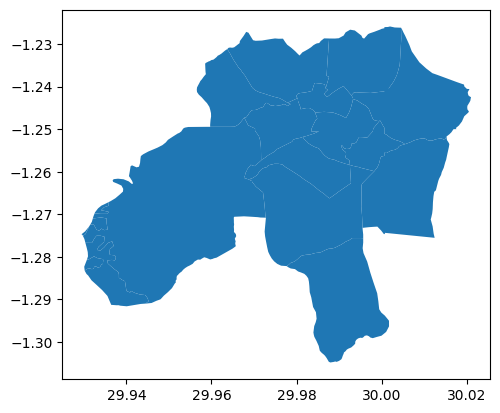

In [127]:
gdf_filtered1.plot()

In [128]:
gdf_filtered1.head()

,dname_2002,d_02_id,cname_2002,c_02_id,sname_2002,s_02_id,pname_2002,p_02_id,ftype,label_p,...,p_06_id,area,perimeter,hectares,dname_2010,sname_2010,subregion,pname_2010,country,geometry
6515,KABALE,404,NDORWA,4042,KITUMBA,404204,MWENDO,40420405.0,Populated Area,Mwendo,...,40420400.0,0.001039,22087.501,1292.189,KABALE,KITUMBA,SOUTH WESTERN,MWENDO,UGANDA,"POLYGON ((29.93037 -1.27671, 29.93014 -1.27581..."
6496,KABALE,404,KABALE MUNICIPALITY,4041,KABALE SOUTHERN,404103,MWANJARI WARD,40410303.0,Populated Area,Mwanjari Ward,...,40410300.0,0.000412,11128.045,508.098,KABALE,KABALE SOUTHERN,SOUTH WESTERN,MWANJARI WARD,UGANDA,"POLYGON ((29.99827 -1.25989, 29.99790 -1.26025..."
6497,KABALE,404,KABALE MUNICIPALITY,4041,KABALE SOUTHERN,404103,KARUBANDA WARD,40410301.0,Populated Area,Karubanda Ward,...,40410300.0,0.000377,9725.885,465.367,KABALE,KABALE SOUTHERN,SOUTH WESTERN,KARUBANDA WARD,UGANDA,"POLYGON ((29.99566 -1.27562, 29.99567 -1.27664..."
6498,KABALE,404,KABALE MUNICIPALITY,4041,KABALE SOUTHERN,404103,RUSHAKI WARD,40410304.0,Populated Area,Rushaki Ward,...,40410300.0,0.000346,8760.338,426.805,KABALE,KABALE SOUTHERN,SOUTH WESTERN,RUSHAKI WARD,UGANDA,"POLYGON ((30.01591 -1.25349, 30.01580 -1.25422..."
6490,KABALE,404,KABALE MUNICIPALITY,4041,KABALE CENTRAL,404101,BUTOBERE WARD,40410101.0,Populated Area,Butobere Ward,...,40410100.0,0.000336,10130.623,414.481,KABALE,KABALE CENTRAL,SOUTH WESTERN,BUTOBERE WARD,UGANDA,"POLYGON ((30.00456 -1.22616, 30.00480 -1.22658..."


**Changing all values in cname_2002 to KABALE MUNICIPALITY**

In [129]:
gdf_filtered1.loc[:, 'cname_2002'] = 'KABALE MUNICIPALITY'
gdf_filtered1

<ipython-input-129-54df47292252>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_filtered1.loc[:, 'cname_2002'] = 'KABALE MUNICIPALITY'


,dname_2002,d_02_id,cname_2002,c_02_id,sname_2002,s_02_id,pname_2002,p_02_id,ftype,label_p,...,p_06_id,area,perimeter,hectares,dname_2010,sname_2010,subregion,pname_2010,country,geometry
6515,KABALE,404,KABALE MUNICIPALITY,4042,KITUMBA,404204,MWENDO,40420405.0,Populated Area,Mwendo,...,40420400.0,1.038761e-03,22087.501,1292.189,KABALE,KITUMBA,SOUTH WESTERN,MWENDO,UGANDA,"POLYGON ((29.93037 -1.27671, 29.93014 -1.27581..."
6496,KABALE,404,KABALE MUNICIPALITY,4041,KABALE SOUTHERN,404103,MWANJARI WARD,40410303.0,Populated Area,Mwanjari Ward,...,40410300.0,4.120606e-04,11128.045,508.098,KABALE,KABALE SOUTHERN,SOUTH WESTERN,MWANJARI WARD,UGANDA,"POLYGON ((29.99827 -1.25989, 29.99790 -1.26025..."
6497,KABALE,404,KABALE MUNICIPALITY,4041,KABALE SOUTHERN,404103,KARUBANDA WARD,40410301.0,Populated Area,Karubanda Ward,...,40410300.0,3.774145e-04,9725.885,465.367,KABALE,KABALE SOUTHERN,SOUTH WESTERN,KARUBANDA WARD,UGANDA,"POLYGON ((29.99566 -1.27562, 29.99567 -1.27664..."
6498,KABALE,404,KABALE MUNICIPALITY,4041,KABALE SOUTHERN,404103,RUSHAKI WARD,40410304.0,Populated Area,Rushaki Ward,...,40410300.0,3.461464e-04,8760.338,426.805,KABALE,KABALE SOUTHERN,SOUTH WESTERN,RUSHAKI WARD,UGANDA,"POLYGON ((30.01591 -1.25349, 30.01580 -1.25422..."
6490,KABALE,404,KABALE MUNICIPALITY,4041,KABALE CENTRAL,404101,BUTOBERE WARD,40410101.0,Populated Area,Butobere Ward,...,40410100.0,3.361508e-04,10130.623,414.481,KABALE,KABALE CENTRAL,SOUTH WESTERN,BUTOBERE WARD,UGANDA,"POLYGON ((30.00456 -1.22616, 30.00480 -1.22658..."
4250,KABALE,404,KABALE MUNICIPALITY,4041,KABALE NORTHERN,404102,KIJUGUTA WARD,40410201.0,Populated Area,Kijuguta Ward,...,40410200.0,2.447781e-04,8329.449,301.835,KABALE,KABALE NORTHERN,SOUTH WESTERN,KIJUGUTA WARD,UGANDA,"POLYGON ((29.96679 -1.22914, 29.96756 -1.22808..."
6494,KABALE,404,KABALE MUNICIPALITY,4041,KABALE NORTHERN,404102,UPPER BUGONGI WARD,40410204.0,Populated Area,Upper Bugongi Ward,...,40410200.0,2.310954e-04,7420.031,284.953,KABALE,KABALE NORTHERN,SOUTH WESTERN,UPPER BUGONGI WARD,UGANDA,"POLYGON ((30.00456 -1.22616, 30.00462 -1.22866..."
6492,KABALE,404,KABALE MUNICIPALITY,4041,KABALE NORTHERN,404102,RUTOOMA WARD,40410203.0,Populated Area,Rutooma Ward,...,40410200.0,1.798002e-04,7265.554,221.716,KABALE,KABALE NORTHERN,SOUTH WESTERN,RUTOOMA WARD,UGANDA,"POLYGON ((29.97790 -1.24379, 29.97861 -1.24410..."
6495,KABALE,404,KABALE MUNICIPALITY,4041,KABALE SOUTHERN,404103,KIRIGIME WARD,40410302.0,Populated Area,Kirigime Ward,...,40410300.0,1.504149e-04,7334.872,185.472,KABALE,KABALE SOUTHERN,SOUTH WESTERN,KIRIGIME WARD,UGANDA,"POLYGON ((29.98152 -1.25181, 29.98155 -1.25195..."
6487,KABALE,404,KABALE MUNICIPALITY,4041,KABALE CENTRAL,404101,NYABIKONI WARD,40410104.0,Populated Area,Nyabikoni Ward,...,40410100.0,1.326733e-04,6331.770,163.598,KABALE,KABALE CENTRAL,SOUTH WESTERN,NYABIKONI WARD,UGANDA,"POLYGON ((29.98346 -1.25049, 29.98345 -1.25052..."


# Merging the diffent polygone to one polygon
 

In [135]:
from shapely.ops import cascaded_union
import geopandas as gpd

# Load the data into a GeoDataFrame
gdf = gdf_filtered1

# Merge the polygons in the 'geometry' column
merged_poly = cascaded_union(gdf['geometry'])

# Simplify and validate the merged polygon
simplified_poly = merged_poly.simplify(0.001, preserve_topology=True)
if not simplified_poly.is_valid:
    simplified_poly = simplified_poly.buffer(0)

# Create a new GeoDataFrame with the merged polygon and the 'ADM2', 'country', and 'pname_2002' columns
merged_gdf = gpd.GeoDataFrame(geometry=[simplified_poly], crs=gdf.crs)
merged_gdf['cname_2002'] = gdf['cname_2002'].iloc[0]
merged_gdf['country'] = gdf['country'].iloc[0]
merged_gdf['pname_2002'] = gdf['pname_2002'].iloc[0]
merged_gdf['dname_2002'] = gdf['dname_2002'].iloc[0]
# Re-order the columns
merged_gdf = merged_gdf.reindex(columns=['cname_2002','country','dname_2002', 'pname_2002',  'geometry'])
merged_gdf 
# Save the merged polygon to a file
#merged_gdf.to_file('merged_polygon.geojson', driver='GeoJSON')


<ipython-input-135-2b0bae8735ac>:8: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  merged_poly = cascaded_union(gdf['geometry'])


,cname_2002,country,dname_2002,pname_2002,geometry
0,KABALE MUNICIPALITY,UGANDA,KABALE,MWENDO,"POLYGON ((29.93843 -1.29143, 29.93644 -1.29127..."


#Add

In [138]:
data1 = merged_gdf 
data1 = data1[['cname_2002', 'pname_2002','country','dname_2002', 'geometry']]
data1.rename({'cname_2002': 'name', 'pname_2002':'parish','country':'country','dname_2002':'district', 'geometry': 'location'}, axis=1, inplace=True)
data1['admin_level'] = 'county'
data1['location']=data1['location'].apply(lambda x:shapely.geometry.mapping(x))
data1['metadata'] = [{'country':a, 'district':b } for a, b  in zip(data1['country'],data1['district'])]
data1.drop(['country','parish', 'district'], inplace=True, axis=1)
time = datetime.utcnow()
data1['createdAt']= time
data1['updatedAt']= time
data1

,name,location,admin_level,metadata,createdAt,updatedAt
0,KABALE MUNICIPALITY,"{'type': 'Polygon', 'coordinates': (((29.93842...",county,"{'country': 'UGANDA', 'district': 'KABALE'}",2023-04-24 14:08:04.594729,2023-04-24 14:08:04.594729


# Inserting value in mongoDB

In [140]:
location_collection.insert_many(data1.to_dict(orient='records'))